# Week 1 

The purpose of this week's exercise is twofold: First, to introduce you to Numpy and making you familiar with the library and some of its pitfalls. Second, you will apply this to estimate the linear model using OLS.

(Jupyter Basics) A few things to note about Jupyter Notebook (ipynb files). (1) Notebooks may run cells individually by selecting a cell and using ctrl + enter. (2) Each notebook runs on a kernel which is selected by the user the first time a cell is run. (3) The kernel "stores" variables as the code is run. To utilize code in a proceeding cell, it is neccessary to run the previous cell. Be careful with overlapping variable names across cells. It becomes messy to clean up.

* The kernel is your installation of Python. Make sure your installation of Python is visible to your environment.

Please note that some of the exercises are purposefully made to return errors. Take the time to identify why they occur.

## A short introduction to Numpy and Linear Algebra (Linalg)
First, import all necessary packages. If you are missing a package, you can either install it through your terminal using pip, or an Anaconda terminal using conda.

In [1]:
import numpy as np # We import the package numpy and name it "np"
from numpy import linalg as la 
# We import the subpackage linalg from numpy and name it "la". 
# In most cases, importing a subpackage is not neccessary when the overarching package has been imported, 
# although lacking dependencies may change functionality in some cases.
from numpy import random as random
from tabulate import tabulate
#(NB if you havent got tabulate yet, install it using !pip install tabulate)
from matplotlib import pyplot as plt

### Entering matrices manually
To create a $1\times9$ *row* vector write,

In [2]:
row = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(row)

[1 2 3 4 5 6 7 8 9]


To create a $9\times1$ *column* vector write,

In [3]:
col = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9]])
print(col)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


An easier method is to define a row vector, and transpose it. Notice the double [[]]. Try to see what happens if you transpose a row vector using only [].

In [4]:
col = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9]]).T
print(col)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


**A short note on numpy vectors**
Numpy does not treat vectors and matrices the same. A *true* numpy vector has the shape (k,), . The shape of a numpy array is an attribute, how do you call this attribute for the `row` and `col` arrays? What is the shape of the `row.T` array? 

In [5]:
# Call the shape attribute for the row and col vars. Check the shape of col.T
# FILL IN HERE
col.T.shape

(1, 9)

To create a matrix, you combine what you have learned to manually create a $3 \times 3$ matrix called x, that has the numbers 0 to 8.

In [6]:
#Create 3x3 matrix called x that has the numbers 0 to 8
x = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Create the same $3 \times 3$ using `np.arange()` and np.reshape()

In [7]:
x = x = np.arange(9).reshape(3,3)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### Matrix calculations 
There are several types of matrix calculations available to us with the numpy library, and we will introduce some here.

For matrix **multiplication** you can for the matrices `a` and `b` use `a@b`, `np.dot(a, b)` or `a.dot(b)`

Perform matrix multiplication on the following:
- `row`$\cdot$`row'`, `row'`$\cdot$`row`, `row`$\cdot$`row`;
- `col`$\cdot$`col'`, `col'`$\cdot$`col`, `col`$\cdot$`col`;
- `x`$\cdot$`x`, `row`$\cdot$`col'`, `col`$\cdot$`row'`.

Does the `row` vector behave as you would expect?

In [8]:
print(row@row.T)
print(row.T@row)
print(row@row)

285
285
285


In [9]:
print(col@col.T)
print(col.T@col)
#print(col@col)

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]
[[285]]


In [28]:
print(x@x)
#print(row@col.T)
#print(col@row.T)
print(row)
print(col.T)

[[ 15  18  21]
 [ 42  54  66]
 [ 69  90 111]]
[1 2 3 4 5 6 7 8 9]
[[1 2 3 4 5 6 7 8 9]]


What happens if you use `*` and `/` operators on the same pairs as above? Does the `col` vector behave as you would expect?

In [10]:
print(row*col.T)
print(row.T*row)
print(row*row)
print(row/row.T)
print(row.T/row)
print(row/row)

[[ 1  4  9 16 25 36 49 64 81]]
[ 1  4  9 16 25 36 49 64 81]
[ 1  4  9 16 25 36 49 64 81]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [30]:
print(col.T*col)
print(col*col)
print(col/col.T)
print(col.T/col)
print(col/col)

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]
[[ 1]
 [ 4]
 [ 9]
 [16]
 [25]
 [36]
 [49]
 [64]
 [81]]
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111]
 [2.         1.         0.66666667 0.5        0.4        0.33333333
  0.28571429 0.25       0.22222222]
 [3.         1.5        1.         0.75       0.6        0.5
  0.42857143 0.375      0.33333333]
 [4.         2.         1.33333333 1.         0.8        0.66666667
  0.57142857 0.5        0.44444444]
 [5.         2.5        1.66666667 1.25       1.         0.83333333
  0.71428571 0.625      0.55555556]
 [6.         3.         2.         1.5        1.2        1.
  0.85714286 0.75       0.66666667]
 [7.         3.5        2.33333333 1.75       1.4        1.166666

In [11]:
print(row*col)
print(col*row)
print(x/x)
print(row/col)
print(col/row)

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]
[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]
[[nan  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
[[1.         2.         3.         4.         5.         6.
  7.         8.         9.        ]
 [0.5        1.         1.5        2.         2.5        3.
  3.5        4.         4.5       ]
 [0.33333333 0.66666667 1.         1.33333333 1.66666667 2.
  2.33333333 2.66666667 3.        ]
 [0.25       0.5        0.75       1.         1.25       1.5
  1.75       2.         2.25      ]
 [0.2        0.4        0.6

/var/folders/yb/2nwpczt56kvbrmb8klk29wfw0000gn/T/ipykernel_12154/1767398005.py:3: RuntimeWarning: invalid value encountered in divide
  print(x/x)


For OLS we need to be able to calculate the inverse. This is done with the `linalg` submodule. Create a new matrix that we can calculate the inverse on. Why can't we take the inverse of `x`?

In [12]:
#Take the inverse of x
#print(la.inv(x))

#Create a new matrix that we can calculate the inverse of
y = np.array([[1, 2, 3], [0, 1, 4], [5, 6, 0]])
print(y)
print(la.inv(y))

[[1 2 3]
 [0 1 4]
 [5 6 0]]
[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]


What do we normally need to check before we take the inverse? What `numpy.linalg` methods can we use to help us check for this?

In [13]:
#Check the determinant of x
print(la.det(x))
#Check the determinant of y
print(la.det(y))

0.0
0.9999999999999964


### Stack vectors or matrices together
If you have several 1-D vectors (has the shape (k,)), you can use `np.column_stack()` to get a matrix with the input vectors put together as column.

If you have matrices (or arrays) that are multidimensional (have the shape (k, t)), you can use `np.hstack()` (means horizontal stack). This is very useful if you already have a matrix, and you want to add a vector.

(i) Try to make a matrix with two `row` vectors, this should give you a $9 \times 2$ vector.

(ii) Make a new vector, and add it to the `x` matrix. This should then be a $3 \times 4$ matrix

In [40]:
#(i) Make a matrix with two row vectors with share (k,) using column stacking
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
C = np.column_stack((A, B))
print(A)
print(B)
print(C)

[1 2 3]
[4 5 6]
[[1 4]
 [2 5]
 [3 6]]


In [15]:
#Make a new vector, and add it to the `x` matrix. This should then be a $3 \times 4$ matrix
D = np.array([7, 8, 9]).reshape(-1, 1)  # form = (3,1)
X = np.hstack((x, D))
print(X)

[[0 1 2 7]
 [3 4 5 8]
 [6 7 8 9]]


### Other methods that you need to know.
The numpy library is vast. Some other methods that are useful are `ones`, `diag`, `diagonal`, `eye`.

## Exercise 1 - Data generation
### 1.1 
Create a synthetic dataset with the following characteristics

\begin{align}
    y_i &= \beta_0 + x_{1i}\beta_1 + x_{2i}\beta_2 + \varepsilon_i
\end{align}

where $\beta_0=1$, $\beta_1 = -0.5$, $\beta_2 = 2$, $x_{1i} \sim \mathcal{N}(0, 4)$, $x_{2i} \sim \mathcal{N}(5, 9)$, $\varepsilon_i \sim \mathcal{N}(0, 1)$, and $(x_{1i},x_{2i})$ and $\varepsilon_i$ are independent, and where $i = 0, ..., 99$. <br>

In [17]:
# Create a seed to always have identical draws.
seed = 25
# Instance a random number generator using this seed.
rng = np.random.default_rng(seed=seed)
n = 100
beta = np.array([1, -0.5, 2]).reshape(-1, 1)

# Make random draws from a normal distribution.
def random_draws(n):
    #draw x0 from a normal distribution with mean 0 and std 4
    x0 = rng.normal(loc=0, scale=4, size=n).reshape(-1, 1)
    #draw x1 from a normal distribution with mean 5 and std 9
    x1 = rng.normal(loc=5, scale=9, size=n).reshape(-1, 1)
    #draw the error term from a normal distribution with mean 0 and std 1
    eps = rng.normal(loc=0, scale=1, size=n).reshape(-1, 1)
    
    # Stack the single columns into a matrix
    X = np.hstack((np.ones((n,1)), x0, x1))  # form = (n, 3)
    
    return X, eps

X, eps = random_draws(n)

# Create y using the betas, X and eps.
y = X @ beta + eps

# Does y have the dimensions you expect?
print(y.shape)
print(X.shape)

(100, 1)
(100, 3)


### 1.2 
Imagine that you had not generated the dataset yourself, but that you were given a similar data set that was already collected (generated) and ready to analyze. What would you observe and not observe in that data set?

The true distribution and its moments

## Exercise 2 - OLS
### 2.1
Remember the mathematical equation for OLS estimation, as we will later use it to estimate the beta coefficients with the data from the previous exercise.<br>
**Write out the OLS estimator in matrix form:**



\begin{align}
 \hat{\boldsymbol{\beta}} =  \left(\frac{1}{N} \sum_{i=1}^N \boldsymbol{x_i}'\boldsymbol{x_i}\right)^{-1} \left(\frac{1}{N} \sum_{i=1}^N \boldsymbol{x_i}'y_i \right)
\end{align}

*Hint: Look it up on p.57 in Wooldridge*

### 2.2
To perform inference on the OLS estimators, we need to calculate the standard errors for the previously estimates OLS coefficients. Again, make sure you remember its equation, *and write up the OLS standard errors in matrix form:*

$\mathbf{\widehat{Var(\boldsymbol{\hat{\beta}})}} = \hat{\sigma}^2 E(X'X)^{-1} $, for $\hat{\sigma}^2 = \sqrt{\dfrac{\sum_{i=0}^{N - 1} \hat{u}^2_i}{N-K}}$, <br>

where $SSR = \sum_{i=0}^{N - 1} \hat{u}^2_i$, $N$ is the number of observations, and $K$ is the number of explanatory variables including the constant.

*Hint: Look it up on p.60 in Wooldridge* <br>
*Hint: Remember that the variance estimate is a function of $\hat{\sigma}^2$, which is calculated using SSR*

### 2.3
Estimate $\boldsymbol{\hat{\beta}}$ from the synthetic data set. Furthermore, calculate standard errors and t-values (assuming that the assumptions of the classical linear regression model are satisfied).

In [22]:
#Define a function that estimates the OLS coefficients, their standard errors and t-values
def ols_estimation(y, X):
    # Make sure that y and X are 2-D.
    y = y.reshape(-1, 1)
    if len(X.shape)<2:
        X = X.reshape(-1, 1)

    # Estimate beta as b_hat = (X'X)^(-1)X'y
    b_hat = la.inv(X.T @ X) @ X.T @ y
    
    # Calculate residuals, u
    residual = y-X.dot(b_hat)
    #Calculate sigma
    sigma = np.sqrt((residual.T.dot(residual) / (n - X.shape[1]))).item()
    #Calculate variance and standard errors of b_hat
    var_b = sigma**2 * la.inv(X.T.dot(X)).diagonal()
    se = np.sqrt(var_b)
   
    # Calculate t-values
    t_values = b_hat/se
    
    return b_hat, se, t_values

b_hat, se, t_values = ols_estimation(y, X)
print(b_hat)
print("-----")
print(se)
print("-----")
print(t_values)

[[ 1.06392683]
 [-0.55703084]
 [ 2.00631743]]
-----
[0.12483523 0.02878184 0.01314932]
-----
[[  8.52264854  36.96521827  80.91115498]
 [ -4.46212834 -19.3535551  -42.36194374]
 [ 16.07172396  69.70776529 152.57953464]]


Python stores vectors as one-dimensional rather than two-dimensional objects. This can sometimes cause havoc when we want to compute matrix products. Compute the outer and inner products of the residuals from above using np.inner() and np.outer(). Compare these with your computed outer and inner products when using matrix multiplication @. When computing outer and inner products of a column vector, a, recall that a'a is the inner product and aa' is the outer product.

In [25]:
res = y-X.dot(b_hat)
inner = np.inner(res, res)
outer = np.outer(res, res)
manual_inner = res.T.dot(res)
manual_outer = res.dot(res.T)

print('res shape:         ', res.shape)
print('inner shape:       ', inner.shape)
print('outer shape:       ', outer.shape)
print('manual_inner shape:', manual_inner.shape)
print('manual_outer shape:', manual_outer.shape)

res shape:          (100, 1)
inner shape:        (100, 100)
outer shape:        (100, 100)
manual_inner shape: (1, 1)
manual_outer shape: (100, 100)


Now if we flatten the residuals to be stored in Python's default mode (i.e. one-dimensional) what happens?

In [26]:
res = res.flatten()
inner = np.inner(res, res)
outer = np.outer(res, res)
matmul_inner = res.T.dot(res)
matmul_outer = res.dot(res.T)

print('res shape:         ', res.shape)
print('inner shape:       ', inner.shape)
print('outer shape:       ', outer.shape)
print('matmul_inner shape:', matmul_inner.shape)
print('matmul_outer shape:', matmul_outer.shape)

res shape:          (100,)
inner shape:        ()
outer shape:        (100, 100)
matmul_inner shape: ()
matmul_outer shape: ()


I have written a code to print a table, using the `tabulate` package. You will need to add the row names for this code to work - each row contains a information about the different coefficients on the explanatory variables.

In [33]:
def print_table(row_names, beta, b_hat, se, t_values):
    table = []

    # Make a list, where each row contains the estimated and calculated values.
    for index, name in enumerate(row_names):
        table_row = [
            name, beta[index], b_hat[index], se[index], t_values[index]
        ]
        table.append(table_row)

    # Print the list using the tabulate class.
    headers = ['', '\u03b2', '\u03b2\u0302 ', 'Se', 't-value']
    print('OLS Estimates:\n')
    print(tabulate(table, headers, floatfmt=['', '.1f', '.3f', '.3f', '.1f']))

row_names = ['intercept', 'x1', 'x2']
print_table(row_names, beta, b_hat, se, t_values)

OLS Estimates:

              β      β̂      Se  t-value
---------  ----  ------  -----  ----------------------------------------
intercept   1.0   1.064  0.125  [ 8.52264854 36.96521827 80.91115498]
x1         -0.5  -0.557  0.029  [ -4.46212834 -19.3535551  -42.36194374]
x2          2.0   2.006  0.013  [ 16.07172396  69.70776529 152.57953464]


Alternatively, you can print a table which you can paste straight into latex using the following code. This uses panda data frames  which we'll cover next week.

In [34]:
import pandas as pd
dat = pd.DataFrame(zip(beta,b_hat.round(4),se.round(4),t_values.round(4)))
dat.columns = ['\u03b2','\u03b2\u0302','se','t-values']
dat.index = ['beta1','beta2','beta3']
print(dat.style.to_latex())

\begin{tabular}{lllrl}
 & β & β̂ & se & t-values \\
beta1 & [1.] & [1.0639] & 0.124800 & [ 8.5226 36.9652 80.9112] \\
beta2 & [-0.5] & [-0.557] & 0.028800 & [ -4.4621 -19.3536 -42.3619] \\
beta3 & [2.] & [2.0063] & 0.013100 & [ 16.0717  69.7078 152.5795] \\
\end{tabular}



## Exercise 3 - a simple Monte Carlo Experiment
Carry out a Monte Carlo experiment with $S = 200$ replications and $N = 100$ observations to check if the OLS estimator provides an unbiased estimate of $\boldsymbol{\beta}$
### 3.1
Generate 200 data sets similar to what you did in exercise 1, and estimate $\boldsymbol{\beta}$ on each of them.

*Hint:* Start by making prefilling two arrays using `np.zeros`, one array to store the estimated beta coefficients, and one to store the estimated standard errors. What shape should these arrays have?

Then make a loop where each loop makes a random draw, and then estimates on this random draw. And finally stores the estimated coefficients and standard errors.

In [35]:
# Initialize the variables and lists
s = 200
n = 100

# Allocate memory for arrays to later fill
b_coeffs = np.zeros((s, beta.size))
b_ses = np.zeros((s, beta.size))

for i in range(s):
    # Generate data
    X, eps = random_draws(n)
    y = X @ beta + eps

    # Estimate coefficients and variance
    b_hat, se, t_values = ols_estimation(y, X)

    # Store estimates
    b_coeffs[i, :] = b_hat.flatten()
    b_ses[i, :] = se.flatten()

# Make sure that there are no more zeros left in the arrays.
assert np.all(b_coeffs) and np.all(b_ses), 'Not all coefficients or standard errors are non-zero.'

In [36]:
def print_table(row_names, beta, b_hat, se, t_values):
    table = []

    # Make a list, where each row contains the estimated and calculated values.
    for index, name in enumerate(row_names):
        table_row = [
            name, beta[index], b_hat[index], se[index], t_values[index]
        ]
        table.append(table_row)

    # Print the list using the tabulate class.
    headers = ['', '\u03b2', '\u03b2\u0302 ', 'Se', 't-value']
    print('OLS Estimates:\n')
    print(tabulate(table, headers, floatfmt=['', '.1f', '.3f', '.3f', '.1f']))

row_names = ['intercept', 'x1', 'x2']
print_table(row_names, beta, b_hat, se, t_values)

OLS Estimates:

              β      β̂      Se  t-value
---------  ----  ------  -----  ----------------------------------------
intercept   1.0   1.138  0.125  [ 9.13010344 39.54629682 87.84043824]
x1         -0.5  -0.490  0.029  [ -3.93491246 -17.04375171 -37.85766912]
x2          2.0   1.988  0.013  [ 15.94893239  69.08149706 153.44417719]


### 3.2
Do the following three calculations:
- Calculate the means of the estimates (means across simulations)
- Calculate the means of the standard errors (means across simulations)
- Calculate the standard error of the MC estimates

In [41]:
mean_b_hat = b_coeffs.mean(axis=0)
mean_b_se = b_ses.mean(axis=0)
mean_mc_se = b_coeffs.std(axis=0)
print(mean_b_hat)
print(mean_b_se)
print(mean_mc_se)

[ 1.00511659 -0.50048145  1.99927859]
[0.1141212  0.02488419 0.01114419]
[0.11133699 0.02345038 0.01217641]


### 3.3
Draw a histogram for the 200 estimates of $\beta_1$. This can be done using matplotlib with the method `plt.hist()`.

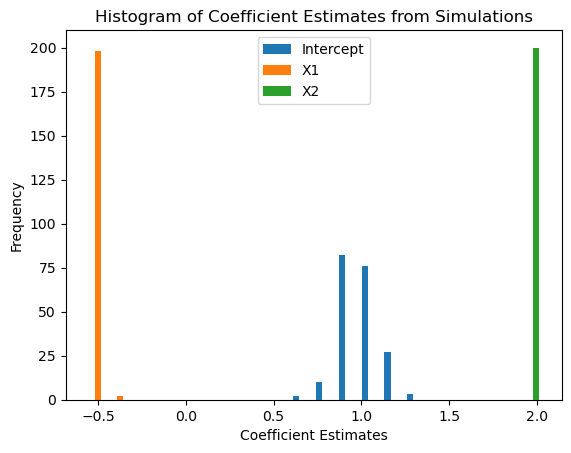

In [42]:
#Draw histograms of the estimates of beta using plt.hist()
plt.hist(b_coeffs, bins=20, label=['Intercept', 'X1', 'X2'])
plt.xlabel('Coefficient Estimates')
plt.ylabel('Frequency')
plt.title('Histogram of Coefficient Estimates from Simulations')
plt.legend()
plt.show()


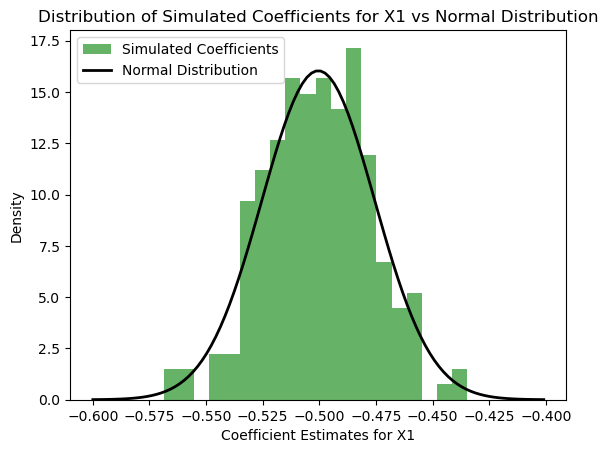

In [44]:
#Plot the distribution of the simulated coefficient for x1 along with a normal distribution with mean equal to the true beta 1 and std equal to the mean of the estimated standard errors
import scipy.stats as stats
x1_coeffs = b_coeffs[:, 1]
mean_x1 = mean_b_hat[1]
std_x1 = mean_b_se[1]
x = np.linspace(mean_x1 - 4*std_x1, mean_x1 + 4*std_x1, 100)
plt.hist(x1_coeffs, bins=20, density=True, alpha=0.6, color='g', label='Simulated Coefficients')
plt.plot(x, stats.norm.pdf(x, mean_x1, std_x1), 'k', linewidth=2, label='Normal Distribution')
plt.xlabel('Coefficient Estimates for X1')
plt.ylabel('Density')
plt.title('Distribution of Simulated Coefficients for X1 vs Normal Distribution')
plt.legend()
plt.show()  